In [1]:
import numpy as np
import pylab as plt

First read the file.

**Note** This file was produced with SQL query reported at https://www.astroml.org/_modules/astroML/datasets/sdss_galaxy_colors.html#fetch_sdss_galaxy_colors
 

In [2]:
data=np.genfromtxt('galaxyquasar.csv', delimiter=',',names=True,usecols=(0,1,2,3,4,6),dtype=float,comments='#')

In [3]:
names = data.dtype.names
names

('u', 'g', 'r', 'i', 'z', 'z1')

In [4]:
data=np.genfromtxt('galaxyquasar.csv', delimiter=',',skip_header=1,usecols=(0,1,2,3,4,6),dtype=float)

In [5]:
data

array([[18.97213   , 18.53676   , 18.5828    , 18.34936   , 18.29215   ,
         0.5228189 ],
       [19.24592   , 17.47646   , 16.47817   , 16.04472   , 15.68851   ,
         0.1228459 ],
       [19.43536   , 17.70268   , 16.91565   , 16.58327   , 16.39128   ,
         0.        ],
       ...,
       [18.62718   , 17.30876   , 16.87371   , 16.62399   , 16.42296   ,
         0.05442934],
       [19.5514    , 18.27711   , 17.62101   , 17.21947   , 17.03347   ,
         0.1125709 ],
       [18.80772   , 17.75751   , 17.405     , 17.2165    , 17.12295   ,
         0.04365238]])

In [6]:
d = dict(zip(names, data.T))
d

{'u': array([18.97213, 19.24592, 19.43536, ..., 18.62718, 19.5514 , 18.80772]),
 'g': array([18.53676, 17.47646, 17.70268, ..., 17.30876, 18.27711, 17.75751]),
 'r': array([18.5828 , 16.47817, 16.91565, ..., 16.87371, 17.62101, 17.405  ]),
 'i': array([18.34936, 16.04472, 16.58327, ..., 16.62399, 17.21947, 17.2165 ]),
 'z': array([18.29215, 15.68851, 16.39128, ..., 16.42296, 17.03347, 17.12295]),
 'z1': array([0.5228189 , 0.1228459 , 0.        , ..., 0.05442934, 0.1125709 ,
        0.04365238])}

In [7]:
lab=np.genfromtxt('galaxyquasar.csv', delimiter=',',skip_header=1,usecols=5,dtype=str)
lab

array(['QSO', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

In [8]:
set(lab)

{'GALAXY', 'QSO'}

Let's build the colors

In [9]:
for diff in ['ug', 'gr', 'ri', 'iz']:
    d[diff]=d[diff[0]]-d[diff[1]] 
d['lab']=lab

In [10]:
d.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'z1', 'ug', 'gr', 'ri', 'iz', 'lab'])

## A quick data exploration

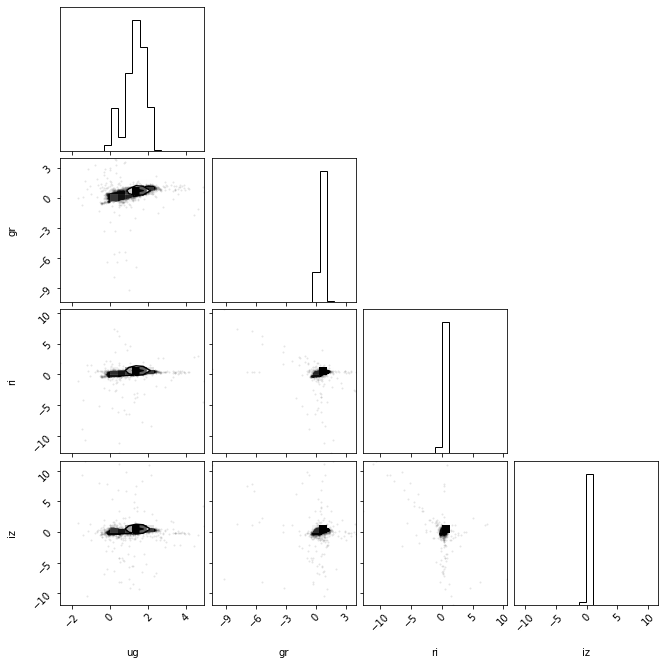

In [11]:
import corner
corner.corner(np.array([d['ug'],d['gr'],d['ri'],d['iz']]).T, labels=['ug', 'gr', 'ri', 'iz']);

There's a bimodality in the ug color...

(0.0, 3.0)

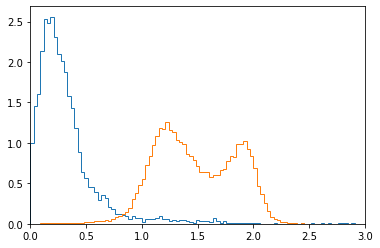

In [12]:
plt.hist(d['ug'][lab=='QSO'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(d['ug'][lab=='GALAXY'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.xlim(0,3)

(0.0, 3.0)

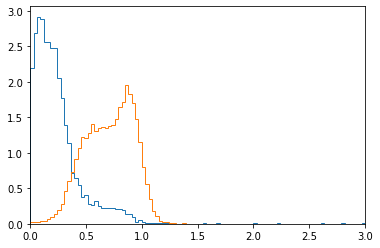

In [13]:
plt.hist(d['gr'][lab=='QSO'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(d['gr'][lab=='GALAXY'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.xlim(0,3)

(0.0, 3.0)

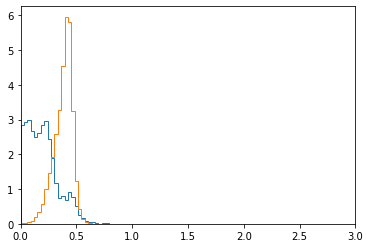

In [14]:
plt.hist(d['ri'][lab=='QSO'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(d['ri'][lab=='GALAXY'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.xlim(0,3)

(0.0, 3.0)

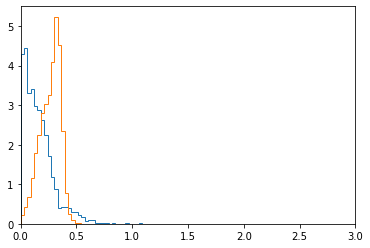

In [15]:
plt.hist(d['iz'][lab=='QSO'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(d['iz'][lab=='GALAXY'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.xlim(0,3)

In [16]:
X=np.array([d['ug'], d['gr'], d['ri'], d['iz']]).T
y = np.array(lab=='QSO',dtype=int)

### Deep learning now...

I'm going to use scikit-learn

In [17]:
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [18]:
sc = StandardScaler()
Xs = sc.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xs, y, test_size=0.33, random_state=42)

In [20]:
X_train.shape

(33500, 4)

Train a first classifier

In [23]:
clf = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=(5), 
    activation='relu',
    solver='adam',
    alpha=0,
    learning_rate_init=0.001,
    max_iter=200)

I'll use only 1000 datapoints for now, just to speed things up

In [24]:
clf.fit(X_train[:1000], y_train[:1000])

/Users/dgerosa/box/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0, hidden_layer_sizes=5)

In [25]:
y_prob=clf.predict_proba(X_test)[:,1]

(0.9, 1.0)

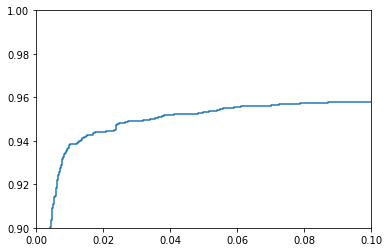

In [26]:
fpr, tpr, thresh = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim(0,0.1)
plt.ylim(0.9,1)

Now optimize the hyperparameters

In [ ]:
len(X_train)

In [28]:
gscv.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (5, 5),
 'max_iter': 200,
 'solver': 'adam'}

In [30]:
bestclf = gscv.best_estimator_

In [31]:
bestclf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0, hidden_layer_sizes=(5, 5))

In [33]:
y_prob=bestclf.predict_proba(X_test)[:,1]

(0.9, 1.0)

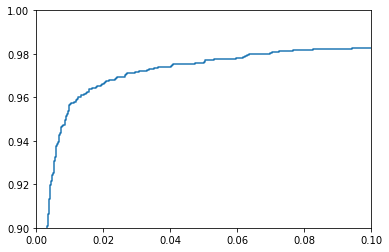

In [34]:
fpr, tpr, thresh = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim(0,0.1)
plt.ylim(0.9,1)

My result is comparable with the best classifier from the suite we've tried before, suggesting the using deep learning on this problem is an overkill.

In [42]:
y_pred=bestclf.predict(Xs)

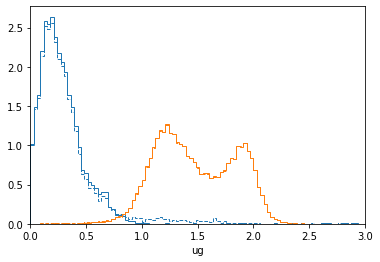

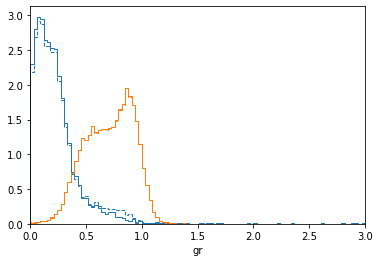

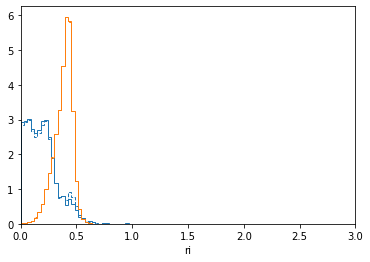

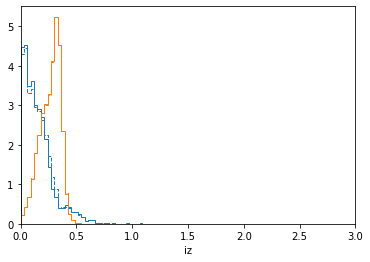

In [46]:
for col in ['ug', 'gr', 'ri', 'iz']:

    plt.hist(d[col][y_pred==1],histtype='step',bins=np.linspace(0,3,100),density=True,color='C0')
    plt.hist(d[col][y_pred==0],histtype='step',bins=np.linspace(0,3,100),density=True,color='C1')

    plt.hist(d[col][lab=='QSO'],histtype='step',bins=np.linspace(0,3,100),density=True,color='C0',ls='dashed')
    plt.hist(d[col][lab=='GALAXY'],histtype='step',bins=np.linspace(0,3,100),density=True,color='C1',ls='dashed')
    plt.xlim(0,3)
    plt.xlabel(col)
    plt.show()